In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Plot decision regions function
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')


In [14]:
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Combined set for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Class distribution
print("Class distribution:", np.bincount(y_train))


Class distribution: [35 35 35]


Dataset is balanced (35 samples per class in training).

No Free Lunch Theorem: No single classifier is best for all problems. Choice depends on linear separability, noise, dataset size, etc.

Step 2: Nonlinear dataset (moons)

In [15]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Combined for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))

# Nonlinear dataset: moons
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))


Class distribution: [35 35 35]


Answer Notes:

No single classifier is best (No Free Lunch theorem).

Linear classifiers work well on linearly separable data like Iris petals; nonlinear classifiers handle moons/XOR.

In [16]:
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))


Moons dataset is nonlinear, suitable for kernel-based methods like RBF SVM.

Exercise 2: Perceptron

Accuracy (Perceptron): 0.9777777777777777


C:\Users\Makhosazane\AppData\Local\Temp\ipykernel_44468\533175326.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


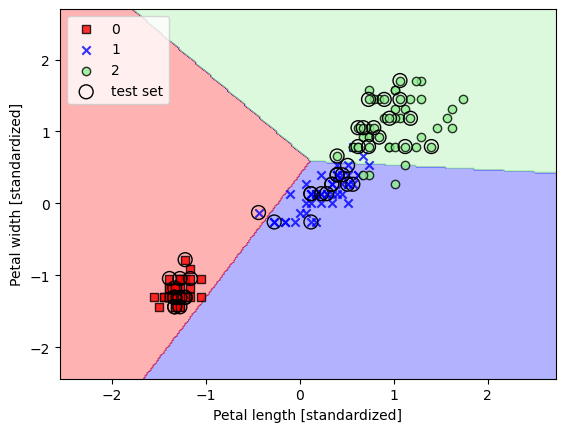

In [17]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy (Perceptron):', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()


Observations:

Varying eta0:

Too small → slower convergence

Too large → overshoot

Fails on moons because it's linear, while moons are nonlinear.

Exercise 3: Logistic Regression

C:\Users\Makhosazane\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Makhosazane\AppData\Local\Temp\ipykernel_44468\533175326.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


Accuracy (LogReg): 0.9777777777777777
Predicted probabilities:
 [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


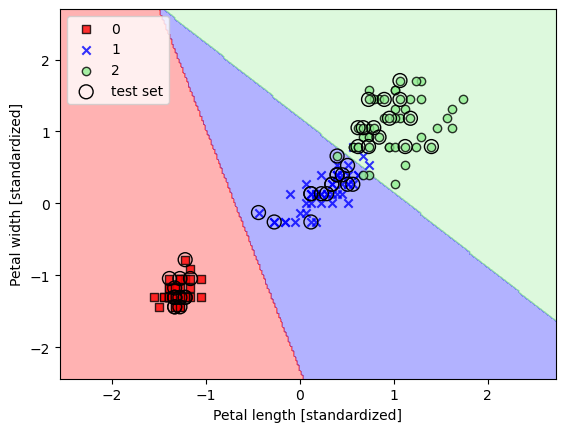

In [18]:
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy (LogReg):', accuracy_score(y_test, y_pred))
print('Predicted probabilities:\n', lr.predict_proba(X_test_std[:3]))

plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()


Observations:

High C → less regularization → may overfit.

Low C → stronger regularization → smoother decision boundary.

Logistic regression fails on moons without kernel features.

Exercise 4: Linear SVM

Accuracy (Linear SVM): 0.9777777777777777
Support vectors:
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.39625036  0.3970548 ]
 [ 0.50779537  0.2659518 ]
 [ 0.61934037  0.3970548 ]
 [ 0.50779537  0.3970548 ]
 [-0.16147468 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.39625036  0.5281578 ]
 [ 0.56356787  0.79036381]
 [ 0.39625036  0.3970548 ]
 [ 0.39625036  0.3970548 ]
 [ 0.73088538  0.5281578 ]
 [ 0.67511288  0.65926081]
 [ 1.12129291  0.5281578 ]
 [ 0.73088538  0.92146681]
 [ 0.56356787  0.79036381]
 [ 1.0097479   0.2659518 ]
 [ 0.67511288  0.92146681]
 [ 0.56356787  0.79036381]
 [ 0.61934037  0.79036381]
 [ 0.73088538  0.3970548 ]
 [ 0.9539754   0.79036381]
 [ 0.73088538  0.92146681]
 [ 0.67511288  0.3970548 ]]


C:\Users\Makhosazane\AppData\Local\Temp\ipykernel_44468\533175326.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


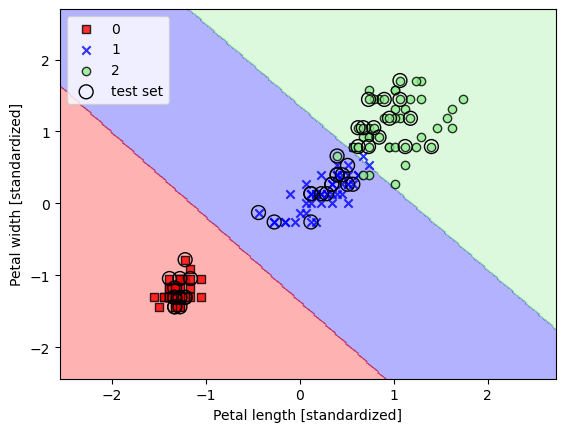

In [19]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy (Linear SVM):', accuracy_score(y_test, y_pred))
print("Support vectors:\n", svm.support_vectors_)

plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()


Increasing C → margin shrinks, fewer misclassifications.

Support vectors are the key points defining the margin.

Exercise 5: Kernel SVM (RBF)

Accuracy (Moons, RBF SVM): 0.9666666666666667


C:\Users\Makhosazane\AppData\Local\Temp\ipykernel_44468\533175326.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


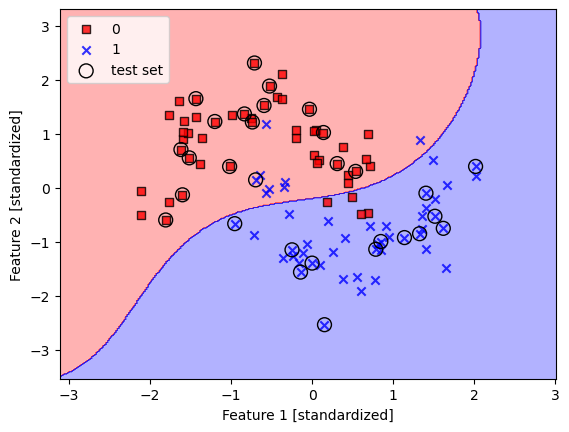

In [20]:
svm_rbf = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1)
svm_rbf.fit(X_train_m_std, y_train_m)

y_pred_m = svm_rbf.predict(X_test_m_std)
print('Accuracy (Moons, RBF SVM):', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf,
                      test_idx=range(len(X_train_m), len(X_combined_m_std)))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.show()


Gamma tuning:

Small → underfit (too smooth)

Large → overfit (complex boundaries)

Kernel SVM works well on nonlinear datasets.

Exercise 6: Decision Trees

Accuracy (Decision Tree): 0.9777777777777777


C:\Users\Makhosazane\AppData\Local\Temp\ipykernel_44468\533175326.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


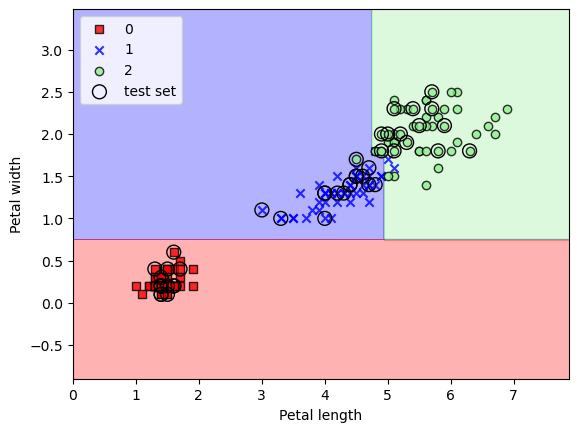

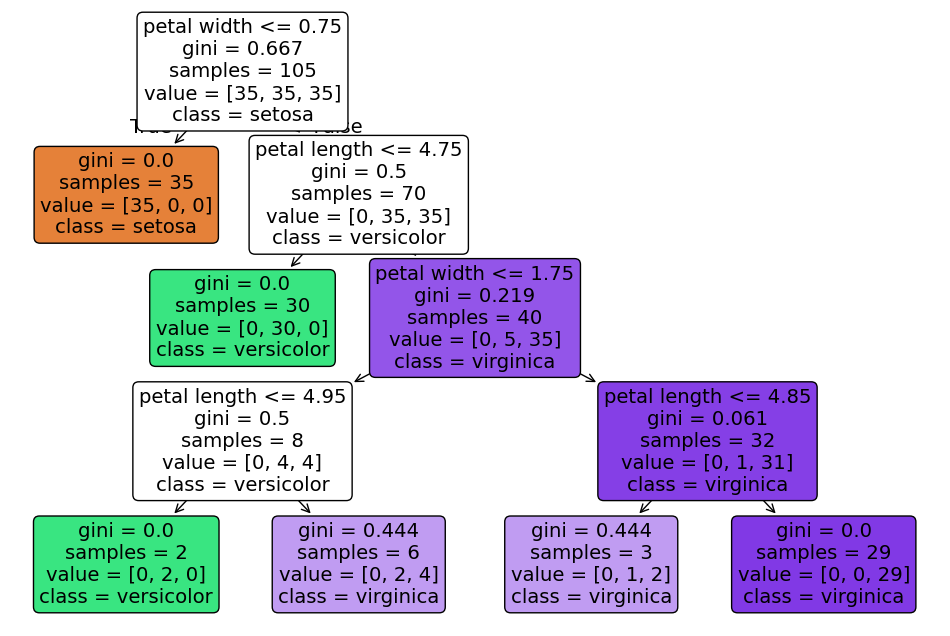

In [21]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print('Accuracy (Decision Tree):', accuracy_score(y_test, y_pred))

X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=tree,
                      test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# Tree visualization
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=['petal length', 'petal width'],
          class_names=iris.target_names, filled=True, rounded=True)
plt.show()


Max depth controls overfitting.

entropy criterion → slightly different splits than gini.

Exercise 7: Random Forests

Accuracy (Random Forest): 0.9777777777777777
Feature importances: [0.52140135 0.47859865]


C:\Users\Makhosazane\AppData\Local\Temp\ipykernel_44468\533175326.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


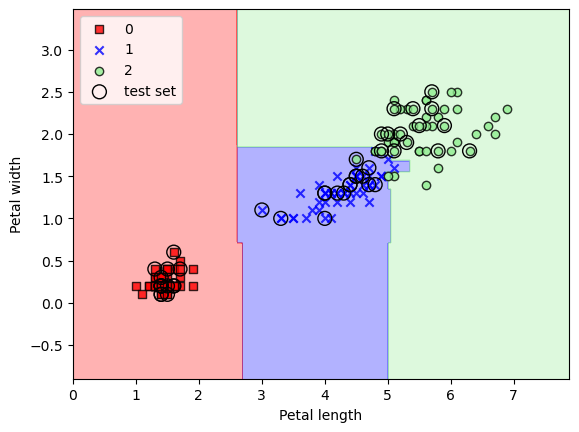

In [22]:
forest = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (Random Forest):', accuracy_score(y_test, y_pred))
print('Feature importances:', forest.feature_importances_)

plot_decision_regions(X_combined, y_combined, classifier=forest,
                      test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


Exercise 8: K-Nearest Neighbors (KNN)

Accuracy (KNN): 1.0


C:\Users\Makhosazane\AppData\Local\Temp\ipykernel_44468\533175326.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


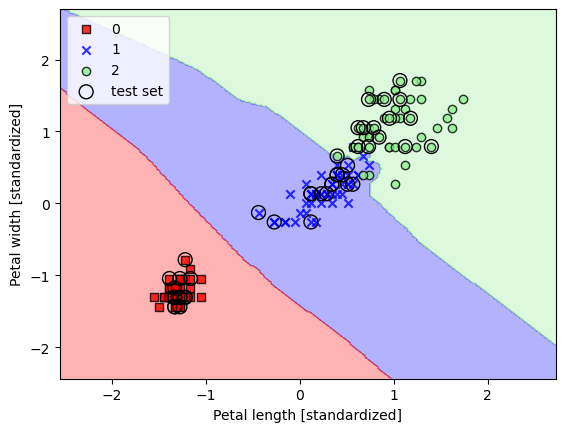

In [23]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Accuracy (KNN):', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=knn,
                      test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()


Vary n_neighbors:

Small → high variance, overfit

Large → high bias, underfit

Manhattan distance (p=1) changes boundary shapes.

Exercise 9: Hyperparameter Tuning and Comparison

In [24]:
# GridSearchCV for RBF SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_std, y_train)
print('Best params (RBF SVM):', grid.best_params_)
print('Best score:', grid.best_score_)

# Compare classifier accuracies
models = {'Perceptron': ppn, 'LogReg': lr, 'SVM': svm,
          'Tree': tree, 'Forest': forest, 'KNN': knn}

for name, model in models.items():
    X_eval = X_test_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test
    y_eval = y_test
    y_pred = model.predict(X_eval)
    print(f'{name} Accuracy: {accuracy_score(y_eval, y_pred)}')


Best params (RBF SVM): {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9619047619047618
Perceptron Accuracy: 0.9777777777777777
LogReg Accuracy: 0.9777777777777777
SVM Accuracy: 0.9777777777777777
Tree Accuracy: 0.9777777777777777
Forest Accuracy: 0.9777777777777777
KNN Accuracy: 1.0


Discussion:

GridSearchCV selects best C and gamma for nonlinear SVM.

Ensembles (Random Forest) handle variance better.

Linear models → Iris (linearly separable).

Nonlinear models (Kernel SVM, KNN) → moons/XOR.

Key Questions:

1. How does regularization prevent overfitting?

Penalizes large weights (LR, SVM), forces simpler model → smoother decision boundary → reduces overfitting.

2. When to use ensembles vs simple models?

Ensembles (Random Forest, Bagging) → when single model is unstable/high variance.

Simple models → fast, interpretable, sufficient if data is clean and separable.